## Modeling_WNV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
def plot_confusion_matrix(y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

In [3]:
def plot_auc_curve(fpr, tpr):
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [57]:
def feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = X_train.columns
    plt.figure(figsize = (8,6))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [4]:

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
final_df = pd.read_csv('../clean_data/final_df.csv')
final_df.head()

,AddressAccuracy,NumMosquitos,WnvPresent,Dist_St2,Station,PrecipTotal,ResultSpeed,ResultDir,AvgSpeed,Tvaglag1,Tvaglag2,Tvaglag3,Tvaglag4,PTotallag1,PTotallag2,PTotallag3,PTotallag4
0,9.0,1.0,0.0,15.8356,2,0.00,2.1,13,3.7,79.0,76.0,77.0,77.0,0.00,0.00,0.000,0.92
1,5.0,1.0,0.0,17.7680,2,0.00,13.4,30,14.1,76.0,79.0,80.0,69.0,0.00,0.05,0.060,0.00
2,8.0,1.0,0.0,14.0404,2,0.02,5.4,11,6.3,68.0,69.0,66.0,71.0,0.00,0.00,0.000,0.00
3,8.0,1.0,0.0,18.0890,2,0.87,6.3,18,10.5,72.0,68.0,61.0,64.0,0.11,0.00,0.001,0.00
4,9.0,3.0,0.0,8.1801,2,0.00,2.1,13,3.7,79.0,76.0,77.0,77.0,0.00,0.00,0.000,0.92


In [6]:
y = final_df['WnvPresent']
X = final_df.drop(columns = 'WnvPresent')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Model 1: Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr = LogisticRegression()

In [10]:
lr.fit(X_train, y_train)

/Users/skarki/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = lr.predict(X_test)

In [12]:
score = lr.score(X_test, y_test)
print(score)

0.7142857142857143


In [13]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[144  53]
 [ 51 116]]


In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.712787622724095

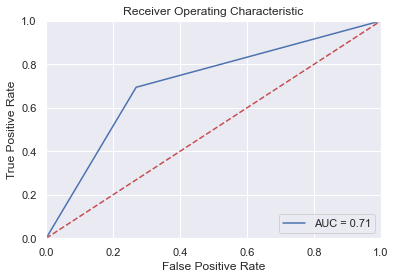

In [43]:
plot_auc_curve(fpr, tpr)

In [59]:
feature_importance(lr)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

## Model 2: Random Forest 

In [15]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

In [16]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [17]:
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [18]:
y_pred_rf = rf.predict(X_test)

In [19]:
score = rf.score(X_test, y_test)
print(score)

0.31104215934664026


In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf)
metrics.auc(fpr, tpr)

0.8323961214626584

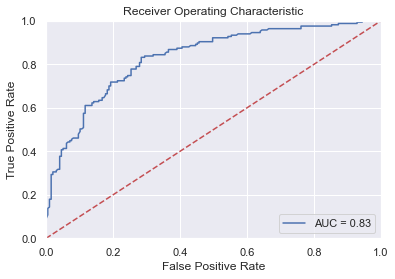

In [45]:
plot_auc_curve(fpr,tpr)

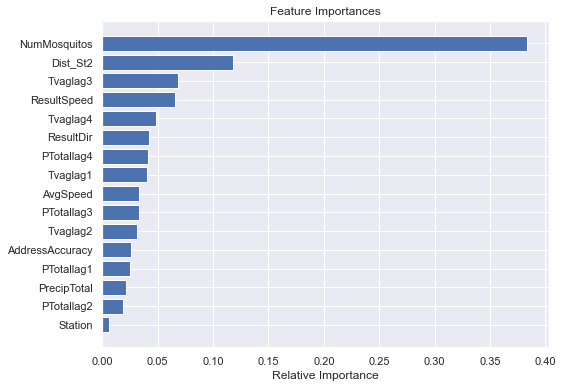

In [58]:
feature_importance(rf)

## Model 3: Decision Tree Classifier

In [22]:
from sklearn import tree

In [23]:
dtree = tree.DecisionTreeClassifier()

In [24]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred_dt = dtree.predict(X_test)

In [26]:
score = dtree.score(X_test, y_test)
print(score)

0.7005494505494505


In [46]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_dt)
metrics.auc(fpr, tpr)

0.7010091492142618

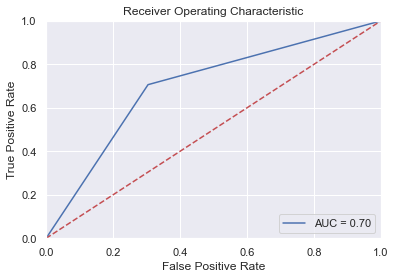

In [47]:
plot_auc_curve(fpr,tpr)

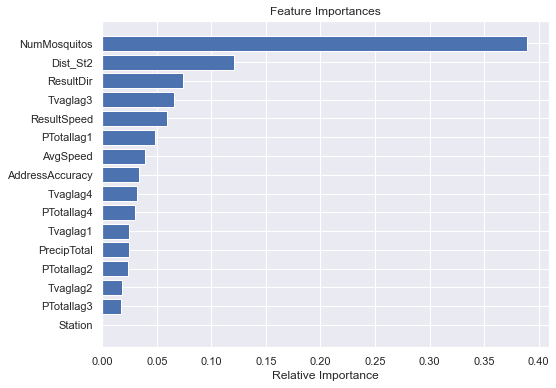

In [60]:
feature_importance(dtree)

## Model 4: K Nearest neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(3)

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_pred_knn = knn.predict(X_test)

In [33]:
score = knn.score(X_test, y_test)
print(score)

0.717032967032967


In [48]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)
metrics.auc(fpr, tpr)

0.7203410438007234

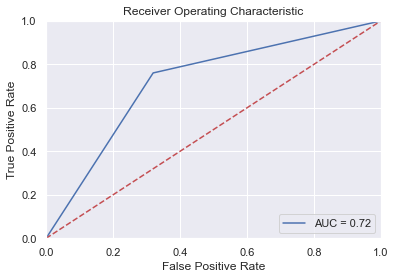

In [49]:
plot_auc_curve(fpr,tpr)

In [61]:
feature_importance(knn)

AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

## Model 5: Gradient Boosting

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
ada = AdaBoostClassifier()

In [37]:
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [38]:
y_pred_ada = ada.predict(X_test)

In [39]:
score = ada.score(X_test, y_test)
print(score)

0.7362637362637363


In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ada)
metrics.auc(fpr, tpr)

0.7358278367123621

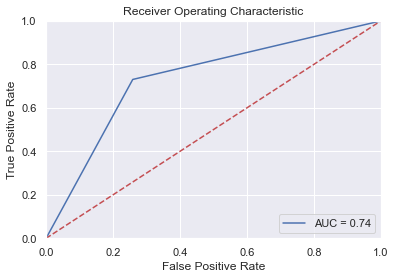

In [51]:
plot_auc_curve(fpr,tpr)

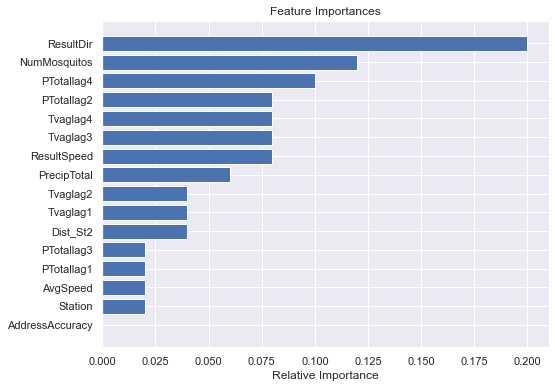

In [62]:
feature_importance(ada)

In [68]:
X_test.mean()

AddressAccuracy     7.909341
NumMosquitos       18.395604
Dist_St2           15.872962
Station             1.626374
PrecipTotal         0.122140
ResultSpeed         5.904670
ResultDir          17.799451
AvgSpeed            7.371978
Tvaglag1           73.508242
Tvaglag2           73.432692
Tvaglag3           72.396978
Tvaglag4           73.928571
PTotallag1          0.172794
PTotallag2          0.151997
PTotallag3          0.117107
PTotallag4          0.135327
dtype: float64